# Training a classifier

### Data
      Torchvision -> that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images

### Training an image classifier
    - Load and normalizing the CIFAR10 training and test datasets using torchvision
    - Define a Convolution Neural Network
    - Define a loss function
    - Train the network on the training data
    - Test the network on the test data

## Loading and normalizing CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
                                [transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root= './data', train=True,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Show training images

In [3]:
import matplotlib.pyplot as plt
import numpy as np

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ...,  0.6392,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  1.0000,  ...,  0.8039,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ...,  0.4196,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  1.0000,  ...,  0.7647,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

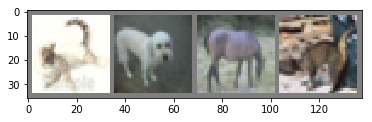

In [4]:
# Functions to show an image
def imshow(img):
    print(img)
    
    img = img / 2 + 0.5 #Unnomarlized
    npimg = img.numpy()
    print(npimg)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' %classes [labels[j]] for j in range(4)))

# Define a Convolution NN 

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # 3-input, 6-output, 5x5 Conv Kernel
        # If increasing the width of network (argument 2 of the 
        # first nn.Conv2d, and argument 1 of the second nn.Conv2d)
        # see what kind of speedup get.
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

# Define a Loss function and optimizer

 use a Classification Cross-Entropy loss and SGD with momentum.
 
 The learnable parameters of a model are returned by "net.parameters()"
 
 weight = weight - learning_rate * gradient

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum= 0.9)

# Train The Network

In [ ]:
# loop over the dataset multiple times
for epoch in range(2): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the input
        inputs, labels = data
        
        #Zero the params gradients
        #Refresh gradient's value 
        optimizer.zero_grad()
        
        # forward + backward + optimize
        '''
            after loss.backward(), we need to use optimizer.step() 
            to proceed gradient descent,
            so the gradient is reserved as the 2 operations are separated.

            In addition, some times we need to accumulate gradient among some batches,
            we can simply backward multiple times and optimize once.
        '''
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass: compute 'gradient' of the loss with respect to model
        # parameters (weight = weight - learning_rate * gradient)
        loss.backward()
        
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        # print every 2000 mini-batches
        if i % 2000  == 1999: 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
        

[1,  2000] loss: 2.210
[1,  4000] loss: 1.830
[1,  6000] loss: 1.652
[1,  8000] loss: 1.535
[1, 10000] loss: 1.465
[1, 12000] loss: 1.434
[2,  2000] loss: 1.348
[2,  4000] loss: 1.321
[2,  6000] loss: 1.301


# Test the network on the test data

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)
print(outputs )

# 具体的にメソッドでの説明
#### torch.max(input, dim, keepdim=False, out=None)  -> return (Tensor, indexOfTensor)

#### Parameters:	
- input (Tensor) – the input tensor
- dim (int) – the dimension to reduce
- keepdim (bool) – whether the output tensors have dim retained or not
- out (tuple, optional) – the result tuple of two output tensors (max, max_indices

In [ ]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Look at how the network performs on the whole dataset.

In [ ]:
correct  = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# What are the classes that performed well, and the classes that did not perform well


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        #Compute output without gradient
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# Training on GPU
- Transfer the neural network onto the GPU

In [ ]:
# Define our devices á the first visible CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)

In [ ]:
net.to(device)

# have to send the inputs and targers at every step to the GPU
inputs, labels = inputs.to(device), labels.to(device)